In [13]:
library(car)

Loading required package: carData


In [36]:
library(lattice)
library(ggplot2)
library(dplyr)
library(randomForest)

ERROR: Error in library(tree): there is no package called 'tree'


In [15]:
DodgersData <- read.csv("dodgers.csv")

In [16]:
str(DodgersData)

'data.frame':	81 obs. of  12 variables:
 $ month      : Factor w/ 7 levels "APR","AUG","JUL",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day        : int  10 11 12 13 14 15 23 24 25 27 ...
 $ attend     : int  56000 29729 28328 31601 46549 38359 26376 44014 26345 44807 ...
 $ day_of_week: Factor w/ 7 levels "Friday","Monday",..: 6 7 5 1 3 4 2 6 7 1 ...
 $ opponent   : Factor w/ 17 levels "Angels","Astros",..: 13 13 13 11 11 11 3 3 3 10 ...
 $ temp       : int  67 58 57 54 57 65 60 63 64 66 ...
 $ skies      : Factor w/ 2 levels "Clear ","Cloudy": 1 2 2 2 2 1 2 2 2 1 ...
 $ day_night  : Factor w/ 2 levels "Day","Night": 1 2 2 2 2 1 2 2 2 2 ...
 $ cap        : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ shirt      : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ fireworks  : Factor w/ 2 levels "NO","YES": 1 1 1 2 1 1 1 1 1 2 ...
 $ bobblehead : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...


In [30]:
glimpse(DodgersData)

Observations: 81
Variables: 13
$ month         <fct> APR, APR, APR, APR, APR, APR, APR, APR, APR, APR, APR...
$ day           <int> 10, 11, 12, 13, 14, 15, 23, 24, 25, 27, 28, 29, 7, 8,...
$ attend        <int> 56000, 29729, 28328, 31601, 46549, 38359, 26376, 4401...
$ day_of_week   <fct> Tuesday, Wednesday, Thursday, Friday, Saturday, Sunda...
$ opponent      <fct> Pirates, Pirates, Pirates, Padres, Padres, Padres, Br...
$ temp          <int> 67, 58, 57, 54, 57, 65, 60, 63, 64, 66, 71, 74, 67, 7...
$ skies         <fct> Clear , Cloudy, Cloudy, Cloudy, Cloudy, Clear , Cloud...
$ day_night     <fct> Day, Night, Night, Night, Night, Day, Night, Night, N...
$ cap           <fct> NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, N...
$ shirt         <fct> NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, YES, NO, ...
$ fireworks     <fct> NO, NO, NO, YES, NO, NO, NO, NO, NO, YES, NO, NO, NO,...
$ bobblehead    <fct> NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, YES, NO, NO, ...
$ Training_Test <fct>

In [17]:
DodgersData$day_of_week <- factor(DodgersData$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

In [18]:
DodgersData$month <- factor(DodgersData$month, levels = c("APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT"))

In [43]:
head(DodgersData, 5)

month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,Training_Test
APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,TRAIN
APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,TEST
APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,TRAIN
APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,TRAIN
APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,TRAIN


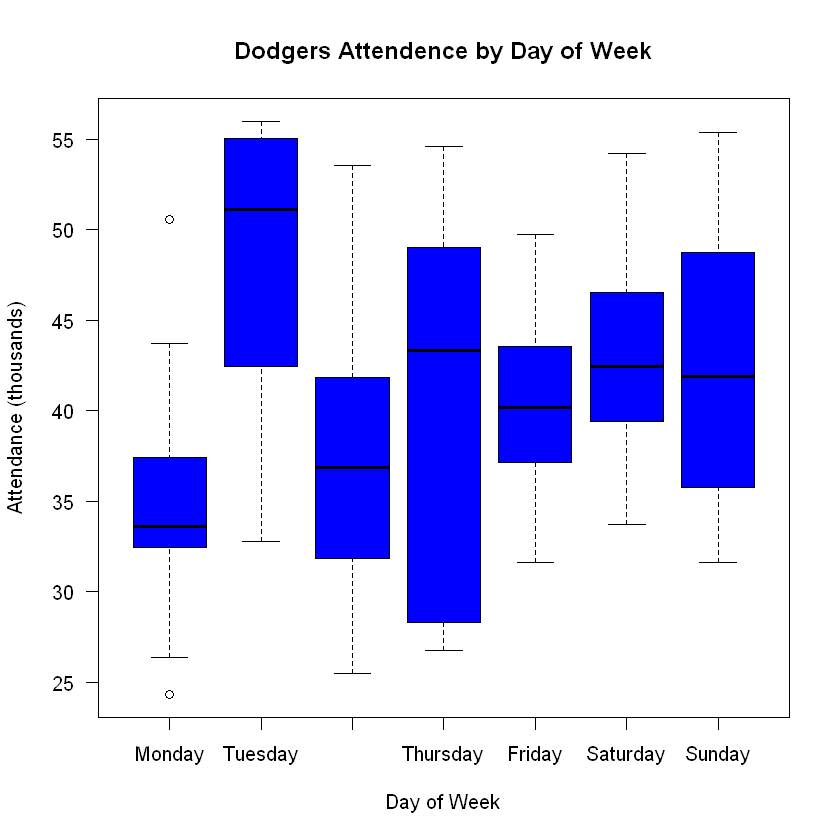

In [44]:
plot(DodgersData$day_of_week, DodgersData$attend / 1000, main = "Dodgers Attendence by Day of Week", xlab = "Day of Week", ylab = "Attendance (thousands)", col = "blue", las = 1)

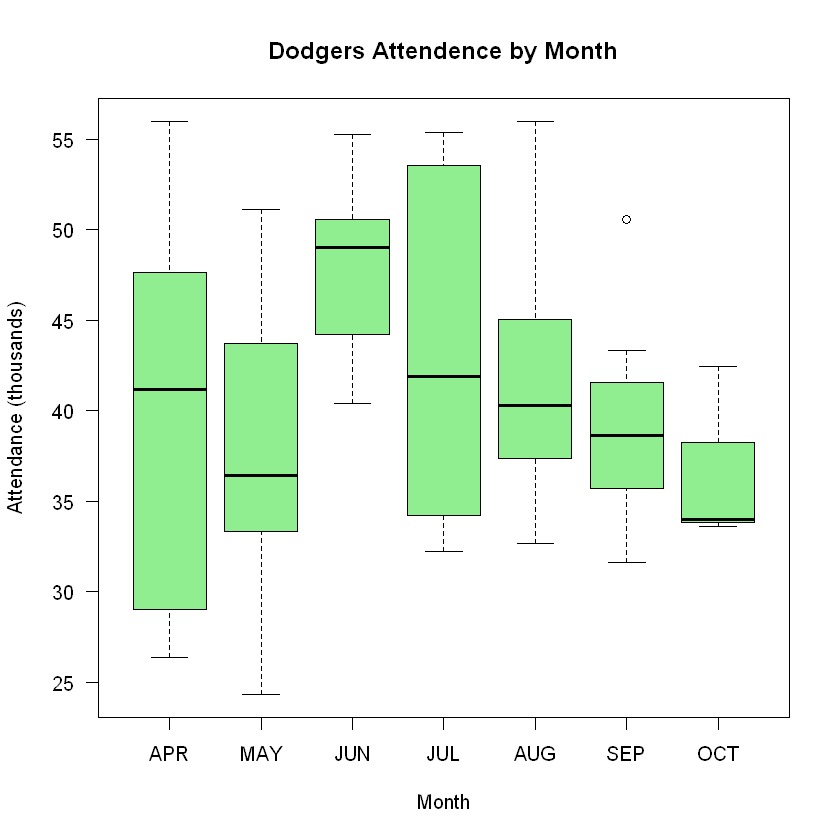

In [45]:
plot(DodgersData$month, DodgersData$attend / 1000, main = "Dodgers Attendence by Month", xlab = "Month", 
ylab = "Attendance (thousands)", col = "light green", las = 1)

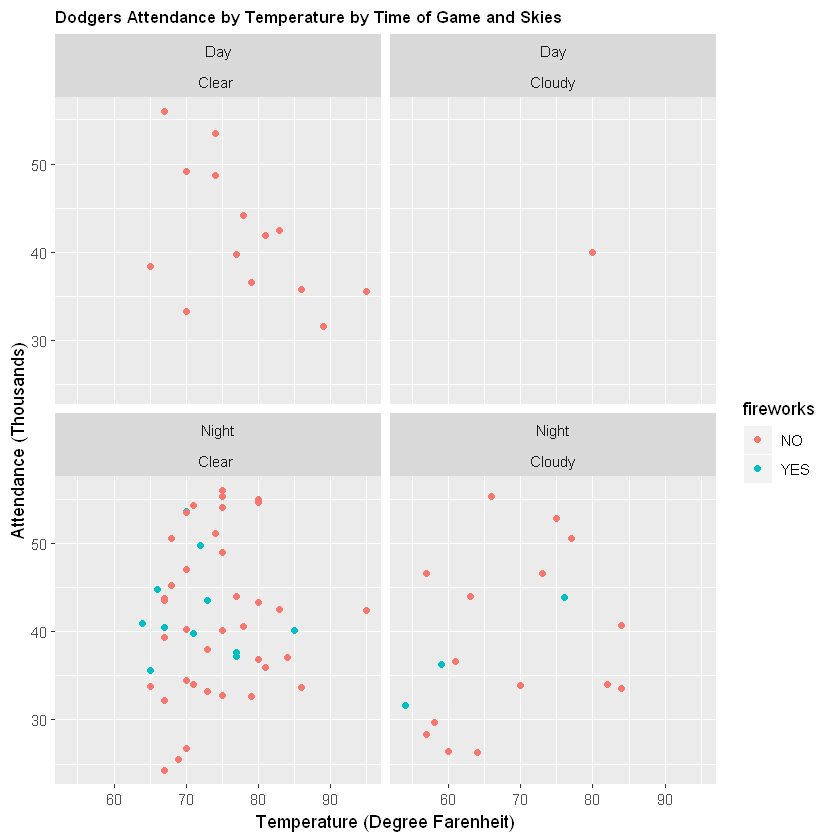

In [48]:
ggplot(DodgersData, aes(x=temp, y=attend/1000, color=fireworks)) + 
        geom_point() + 
        facet_wrap(day_night~skies) + 
        ggtitle("Dodgers Attendance by Temperature by Time of Game and Skies") +
        theme(plot.title = element_text(lineheight=3, face="bold", color="black", size=10)) +
        xlab("Temperature (Degree Farenheit)") +
        ylab("Attendance (Thousands)")

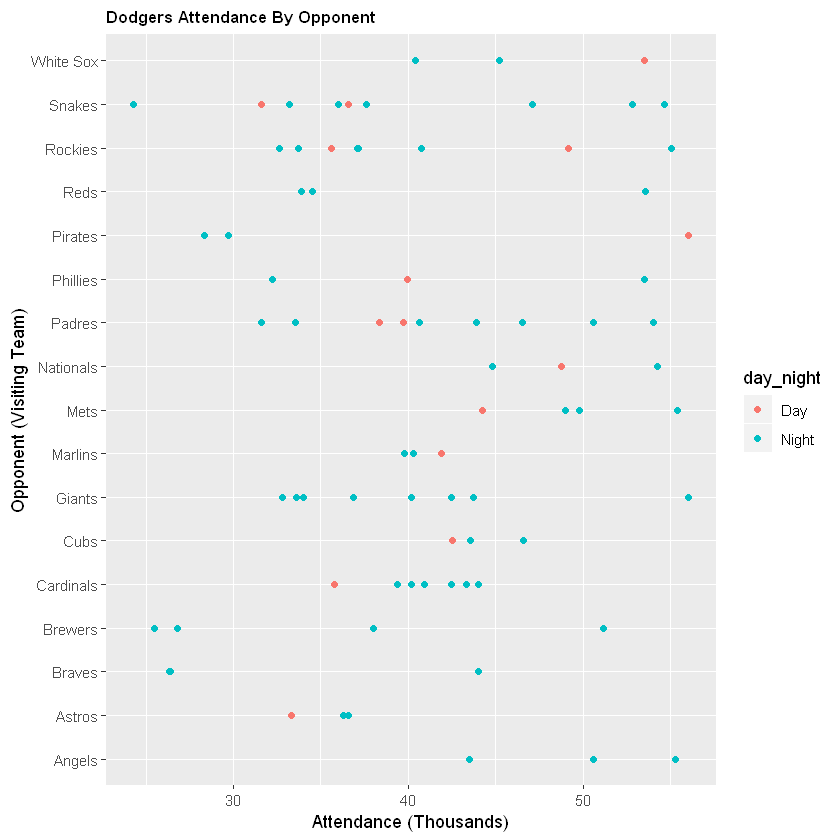

In [23]:
ggplot(DodgersData, aes(x=attend/1000, y=opponent, color=day_night)) + 
        geom_point() + 
        ggtitle("Dodgers Attendance by Opponent") +
        theme(plot.title = element_text(lineheight=3, face="bold", color="black", size=10)) +
        xlab("Attendance (Thousands)") +
        ylab("Opponent (Visiting Team)")


In [46]:
# Create a model with the bobblehead variable entered last
my.model <- {attend ~ month + day_of_week + bobblehead}

set.seed(1234)

training_test <- c(rep(1, trunc((2/3)*nrow(DodgersData))), rep(2, trunc((1/3)*nrow(DodgersData))))

DodgersData$Training_Test <- sample(training_test)

DodgersData$Training_Test <- factor(DodgersData$Training_Test, levels = c(1, 2), labels = c("TRAIN", "TEST"))


DodgersData.Train <- subset(DodgersData, Training_Test == "TRAIN")
DodgersData.Test <- subset(DodgersData, Training_Test == "TEST")

head(DodgersData.Train)
head(DodgersData.Test)

# Fit model to training set
train.model.fit <- lm(my.model, data = DodgersData.Train)

# Predict from Training Set
DodgersData.Train$Predict_Attend <- predict(train.model.fit)

# Evaluate The Fitted Model on Test Set
DodgersData.Test$Predict_Attend <- predict(train.model.fit, newdata = DodgersData.Test)

round(cor(DodgersData.Test$attend, DodgersData.Test$Predict_Attend)^2, digits=3)

# Calculate the proportion of response variance accounted for when predicting Test Data
cat("\n","Proportion of Test Set Variance Accounted for: ", round(cor(DodgersData.Test$attend, DodgersData.Test$Predict_Attend)^2, digits=3), "\n", sep="")

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,Training_Test
1,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,TRAIN
3,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,TRAIN
4,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,TRAIN
5,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,TRAIN
6,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO,TRAIN
7,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO,TRAIN


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,Training_Test
2,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,TEST
9,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO,TEST
11,APR,28,54242,Saturday,Nationals,71,Clear,Night,NO,NO,NO,YES,TEST
12,APR,29,48753,Sunday,Nationals,74,Clear,Day,NO,YES,NO,NO,TEST
13,MAY,7,43713,Monday,Giants,67,Clear,Night,NO,NO,NO,NO,TEST
14,MAY,8,32799,Tuesday,Giants,75,Clear,Night,NO,NO,NO,NO,TEST


[1] 0.383


Proportion of Test Set Variance Accounted for: 0.383


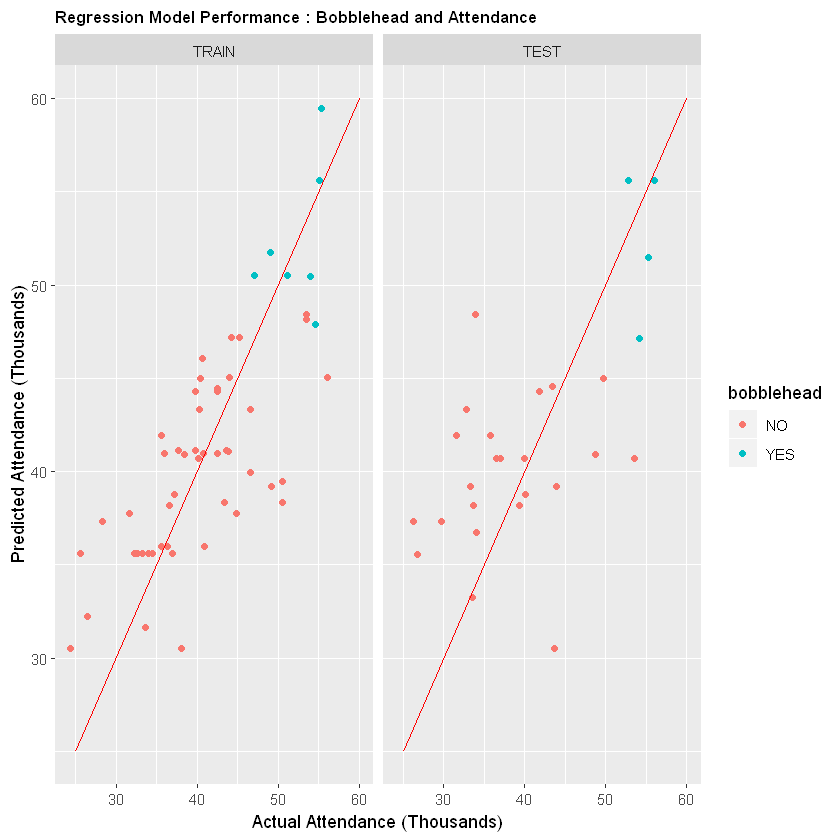

In [51]:
DodgersData.Training_Test <- rbind(DodgersData.Train, DodgersData.Test)

ggplot(DodgersData.Training_Test, aes(x=attend/1000, y=Predict_Attend/1000, color=bobblehead)) + 
        geom_point() + 
        geom_line(data = data.frame(x = c(25,60), y = c(25,60)), aes(x = x, y = y), colour = "red") +
        facet_wrap(~Training_Test) +
        ggtitle("Regression Model Performance : Bobblehead and Attendance") +
        theme(plot.title = element_text(lineheight=3, face="bold", color="black", size=10)) +
        xlab("Actual Attendance (Thousands)") +
        ylab("Predicted Attendance (Thousands)")

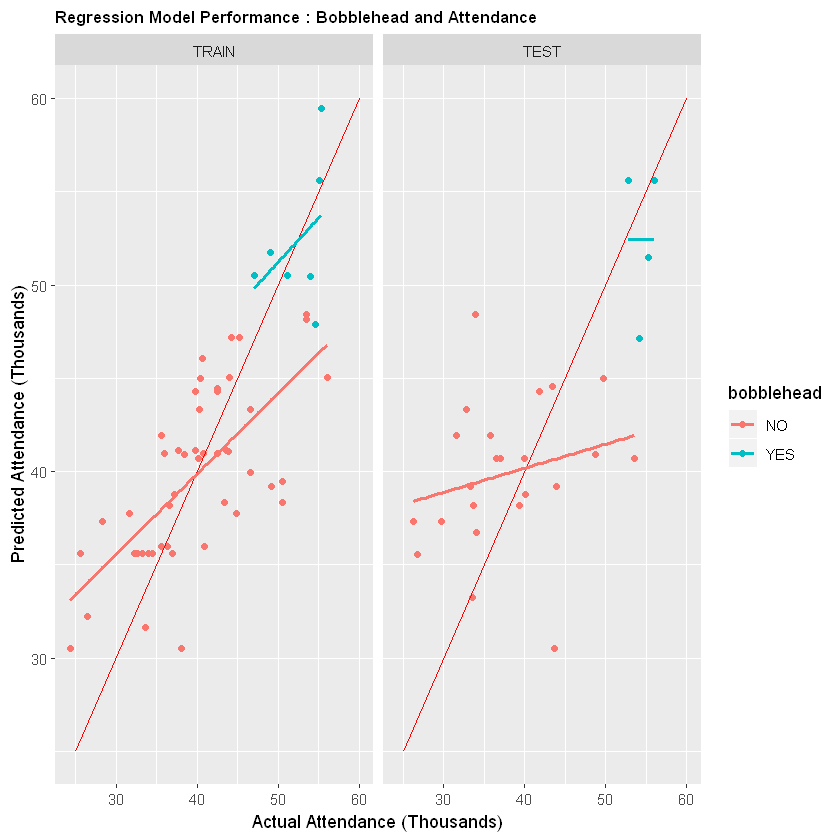

In [52]:
ggplot(DodgersData.Training_Test, aes(x=attend/1000, y=Predict_Attend/1000, color=bobblehead)) + 
        geom_point() + 
        geom_line(data = data.frame(x = c(25,60), y = c(25,60)), aes(x = x, y = y), colour = "red") +
        facet_wrap(~Training_Test) +
        geom_smooth(method = "lm", se=FALSE) +
        ggtitle("Regression Model Performance : Bobblehead and Attendance") +
        theme(plot.title = element_text(lineheight=3, face="bold", color="black", size=10)) +
        xlab("Actual Attendance (Thousands)") +
        ylab("Predicted Attendance (Thousands)")

In [26]:
my.model.fit <- lm(my.model, data = DodgersData)  # use all available data
print(summary(my.model.fit))


Call:
lm(formula = my.model, data = DodgersData)

Residuals:
     Min       1Q   Median       3Q      Max 
-10786.5  -3628.1   -516.1   2230.2  14351.0 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          33909.16    2521.81  13.446  < 2e-16 ***
monthMAY             -2385.62    2291.22  -1.041  0.30152    
monthJUN              7163.23    2732.72   2.621  0.01083 *  
monthJUL              2849.83    2578.60   1.105  0.27303    
monthAUG              2377.92    2402.91   0.990  0.32593    
monthSEP                29.03    2521.25   0.012  0.99085    
monthOCT              -662.67    4046.45  -0.164  0.87041    
day_of_weekTuesday    7911.49    2702.21   2.928  0.00466 ** 
day_of_weekWednesday  2460.02    2514.03   0.979  0.33134    
day_of_weekThursday    775.36    3486.15   0.222  0.82467    
day_of_weekFriday     4883.82    2504.65   1.950  0.05537 .  
day_of_weekSaturday   6372.06    2552.08   2.497  0.01500 *  
day_of_weekSunday     672

In [32]:
print(anova(my.model.fit))

Analysis of Variance Table

Response: attend
            Df     Sum Sq   Mean Sq F value    Pr(>F)    
month        6  948958117 158159686  4.2225  0.001158 ** 
day_of_week  6 1314813030 219135505  5.8504 6.002e-05 ***
bobblehead   1  734587177 734587177 19.6118 3.590e-05 ***
Residuals   67 2509574563  37456337                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [33]:
cat("\n","Estimated Effect of Bobblehead Promotion on Attendance: ",
    round(my.model.fit$coefficients[length(my.model.fit$coefficients)],
          digits = 0),"\n",sep="")


Estimated Effect of Bobblehead Promotion on Attendance: 10715


In [38]:
dodgersfortree<-DodgersData[,-16]
names(DodgersData)

[1] "month"         "day"           "attend"        "day_of_week"  
 [5] "opponent"      "temp"          "skies"         "day_night"    
 [9] "cap"           "shirt"         "fireworks"     "bobblehead"   
[13] "Training_Test"

Warning message in data(dodgersfortree):
"data set 'dodgersfortree' not found"

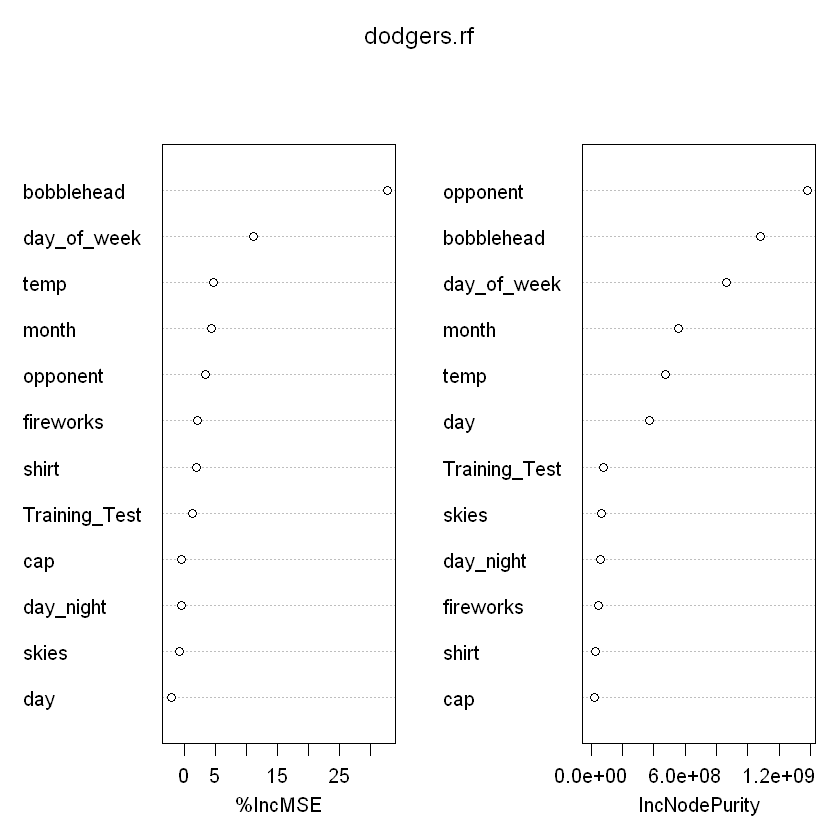

In [39]:
#wanted to check out this random tree stuff a bit
par(mfrow=c(1,1))
set.seed(4543)
data(dodgersfortree)
dodgers.rf <- randomForest(attend ~ ., data=dodgersfortree, ntree=1000, keep.forest=FALSE,importance=TRUE)

varImpPlot(dodgers.rf)
